This is a notebook for analysing marketing campaigns using Python

In [35]:
import pandas as pd

# Load the csv making sure data columns are assigned properly 

marketing = pd.read_csv("marketing.csv", parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [12]:
# How many columns and rows are there in the dataframe ?
marketing.shape

(10037, 12)

In [36]:
# what are the datatypes of columns ?
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [15]:
# is_retained should be a boolean so lets convert it to a boolean
marketing['is_retained'] = marketing['is_retained'].astype("bool")

# Check the data type of is_retained to make sure it has been changed
print(marketing['is_retained'].dtype)

bool


In [27]:
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code'],
      dtype='object')

In [28]:
# How many values are in the column of marketing_channel ?

marketing.subscribing_channel.value_counts()

Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64

In [29]:
# Lets change the names of channels to numbers : This can be done by Mapping

channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)


In [30]:
# check the column to make sure it has been created
marketing.subscribing_channel.value_counts()

Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64

In [31]:
# Now, lets add a column which would tell us if the ad was displayed in the language preferred by the customer 

import numpy as np

# Add the new column is_correct_lang which is checking here if language preferred is equal to language displayed

marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

marketing.is_correct_lang.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object

In [33]:
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang'],
      dtype='object')

In [40]:
# Add a Day of the week "DOW" column which would tell us the day of week

marketing['dow'] = marketing['date_subscribed'].dt.dayofweek    


In [45]:
marketing.dow.value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: dow, dtype: int64

In [46]:
# Lets now group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


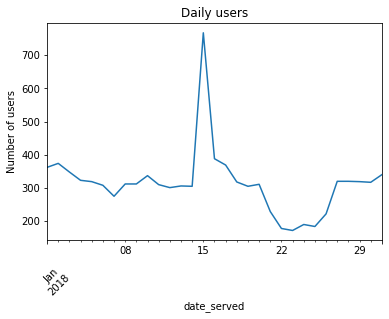

In [52]:

import matplotlib.pyplot as plt

# Lets now Plot the daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()